# Deep Learning Assignment:

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


### Reading the data from the files:

In [3]:
trainX = pd.read_pickle("C:\\Users\\dell\\Downloads\\Assignment3\\trainX.pickle")
trainY = pd.read_pickle("C:\\Users\\dell\\Downloads\\Assignment3\\trainY.pickle")
testX = pd.read_pickle("C:\\Users\\dell\\Downloads\\Assignment3\\testX.pickle")

In [5]:
trainX.shape

(60000, 28, 28)

In [6]:
trainY.shape

(60000,)

### The first five images of the training set are:

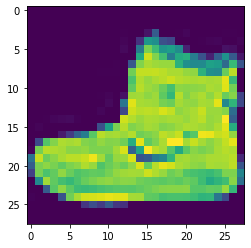

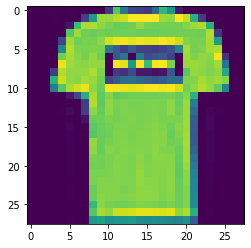

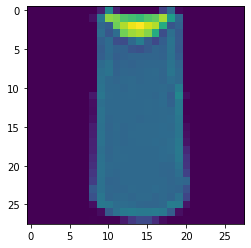

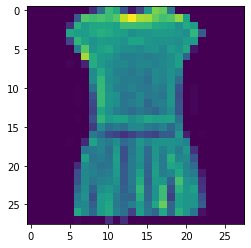

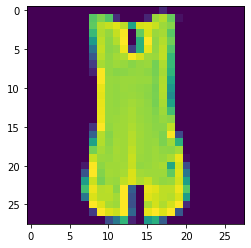

In [7]:
for i in range(5):
    plt.imshow(trainX[i, :, :])
    plt.show()

In [8]:
print(max(trainY))
print(min(trainY))

9
0


In [70]:
# The above values signifies that the images in trainX belongs to 10 classes specified in trainY ranging between 0 to 9.

### Parameters:

In [58]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
#Model
NO_EPOCHS = 50
BATCH_SIZE = 128

### Splitting and preprocessing the data:

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=2018)

In [60]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
testX = testX.reshape(testX.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))

## Training the model:

In [61]:
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

### Architecture: image->Conv2D->Maxpooling2D->Dropout->Conv2D->maxpooling->Dropout->Conv2D->Dropout->Flatten->Dense->Dropout->Dense

In [62]:
#Model
model = Sequential()
# Add convolution 2D
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',kernel_initializer='he_normal',input_shape=(IMG_ROWS, IMG_COLS, 1)))
model.add(MaxPooling2D((2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add dropouts to the model
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# Add dropouts to the model
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))


model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


### Inspecting the model:

In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 3, 128)         73856     
__________

### Running the model:

In [64]:
model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=NO_EPOCHS, verbose=1, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 71s 1ms/step - loss: 0.7045 - acc: 0.7417 - val_loss: 0.4175 - val_acc: 0.8493
Epoch 2/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.4454 - acc: 0.8390 - val_loss: 0.3413 - val_acc: 0.8786
Epoch 3/50
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3880 - acc: 0.8595 - val_loss: 0.3077 - val_acc: 0.8883
Epoch 4/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.3574 - acc: 0.8701 - val_loss: 0.2860 - val_acc: 0.8967
Epoch 5/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.3344 - acc: 0.8781 - val_loss: 0.2741 - val_acc: 0.9015
Epoch 6/50
48000/48000 [==============================] - 66s 1ms/step - loss: 0.3191 - acc: 0.8829 - val_loss: 0.2734 - val_acc: 0.9012
Epoch 7/50
48000/48000 [==============================] - 67s 1ms/step - loss: 0.3041 - acc: 0.8881 - val_loss: 0.2555 - val_acc

In [67]:
y_pred = model.predict_classes(testX)

In [68]:
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [69]:
pd.DataFrame(y_pred).to_pickle("Predictions.pickle")

### With a complex sequential model of multiple convolution layers and multiple dropout layers (to reduce overfitting) , an accuracy of ~93% is obtained. Results are saved in "Predictions.pickle" file.